In [8]:
import numpy as np
# %matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


"""Specifying the training and testing data directories"""

In [2]:
dir='/content/drive/MyDrive/Kaggle Datasets/Municipal Solid Waste Dataset'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)


In [13]:
train_generator= datagen.flow_from_directory(
        dir,
        target_size=(150, 150),
        color_mode='rgb',
        class_mode='categorical',
        batch_size=32,
        shuffle=True,
        subset='training',
        seed=24)
validation_generator= datagen.flow_from_directory(
        dir,
        target_size=(150, 150),
        color_mode='rgb',
        class_mode='categorical',
        subset='validation',
        batch_size=32,
        seed=24)

Found 351 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 41472)               │         165,888 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      21,234,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,406,691 (81.66 MB)

 Trainable params: 21,323,747 (81.34 MB)

 Non-trainable params: 82,944 (324.00 KB)

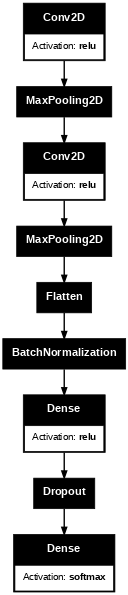

In [10]:
from tensorflow import keras
keras.utils.plot_model(model, "my_cnn_model.png",dpi=50,show_layer_activations=True)

In [11]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=15,
                        verbose=2, restore_best_weights=True)
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',
              metrics = ['acc'])

In [14]:
history = model.fit(train_generator, validation_data=validation_generator,epochs=5,
                              verbose=2, callbacks=[monitor])

Epoch 1/5
11/11 - 24s - 2s/step - acc: 0.7692 - loss: 5.3080 - val_acc: 0.5128 - val_loss: 0.9850
Epoch 2/5
11/11 - 19s - 2s/step - acc: 0.8490 - loss: 1.0869 - val_acc: 0.4103 - val_loss: 1.1215
Epoch 3/5
11/11 - 3s - 255ms/step - acc: 0.9145 - loss: 0.2319 - val_acc: 0.4103 - val_loss: 0.9954
Epoch 4/5
11/11 - 2s - 164ms/step - acc: 0.9145 - loss: 0.3051 - val_acc: 0.4359 - val_loss: 1.0278
Epoch 5/5
11/11 - 2s - 163ms/step - acc: 0.9573 - loss: 0.1209 - val_acc: 0.5385 - val_loss: 1.0032
Restoring model weights from the end of the best epoch: 1.


In [15]:
loss, acc = model.evaluate(validation_generator)
print('Test loss = {:.4f} '.format(loss))
print('Test acc = {:.4f} '.format(acc))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - acc: 0.4877 - loss: 0.9864 
Test loss = 0.9850 
Test acc = 0.5128 


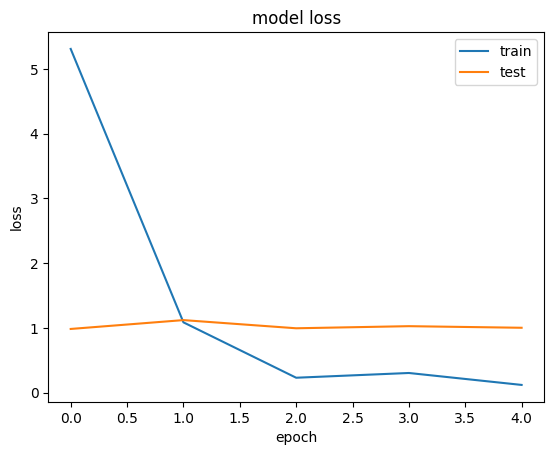

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [19]:
# test_generator = test_datagen.flow_from_directory(
#     directory="/content/drive/MyDrive/Kaggle Datasets/Oil Waste/testing", target_size=(150, 150), color_mode='rgb',
#     class_mode='categorical', batch_size=47, shuffle=False,
#     seed=24)


In [20]:
# loss, acc = model.evaluate(test_generator)
# print('Test loss = {:.4f} '.format(loss))
# print('Test acc = {:.4f} '.format(acc))


In [23]:
"""Inferencing on any image"""

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(fn)

categories = ["biodegradable","Recyclable","Trash"]
print("Category of image ", fn, "might be most likely ", categories[np.argmax(classes[0])])



Saving TRAIN.2_BIODEG_ORI_1170.jpg to TRAIN.2_BIODEG_ORI_1170.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
TRAIN.2_BIODEG_ORI_1170.jpg
Category of image  TRAIN.2_BIODEG_ORI_1170.jpg might be most likely  Recyclable


In [ ]:
# """Inferencing on any image"""

# from google.colab import files
# from keras.preprocessing import image

# uploaded = files.upload()
# for fn in uploaded.keys():

#   # predicting images
#   path = fn
#   img = image.load_img(path, target_size=(150, 150))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images)
#   print(fn)

# categories = ["bersih","kotor","lumayan_kotor"]
# print("Category of image ", fn, "might be most likely ", categories[np.argmax(classes[0])])

